In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load("../logs/Curriculum/HalfCheetah-v4_1/evaluations.npz", allow_pickle=True)

reward_main = data['results_main'].mean(axis=1)
reward_task = data['results_task'].mean(axis=1)
task = data['task']

In [3]:
baseline_data = np.load("../logs/Curriculum/HalfCheetah-v4_baseline/evaluations.npz", allow_pickle=True)

reward_main_baseline = baseline_data['results_main'].mean(axis=1)
reward_task_baseline = baseline_data['results_task'].mean(axis=1)
task_baseline = baseline_data['task']

In [4]:
task_to_int = {
            "enhanced_stability": 0.7 * 1000,
            "basic_movement": 0.5 * 1000,
            "balanced_control_efficiency": 0.6* 1000,
            "prioritized_forward_movement": 0.75 * 1000
        }

task_threshold = []
for t in task:
    if t is not None:
        task_threshold.append(task_to_int[t])
    else:
        task_threshold.append(0)

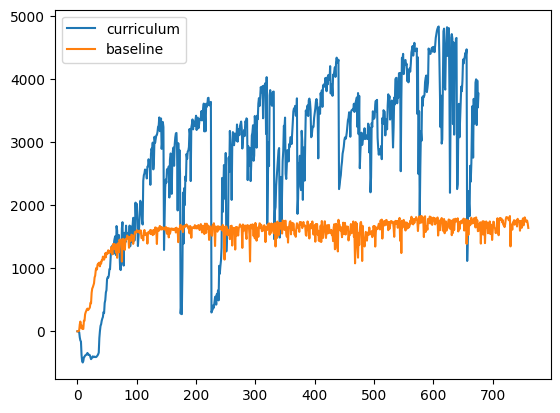

In [5]:
plt.plot(reward_main, label='curriculum')
plt.plot(reward_main_baseline, label='baseline')
plt.legend()

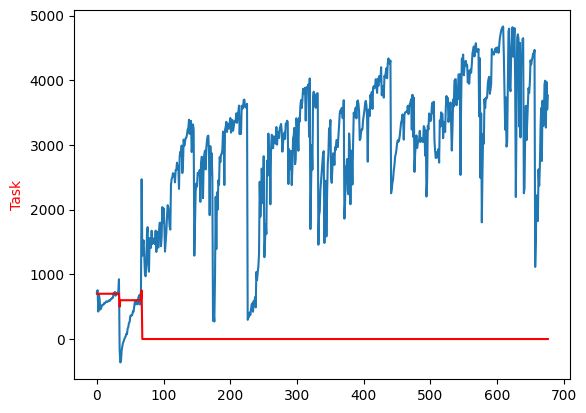

In [6]:
fig, ax1 = plt.subplots()

# Create the first plot with blue color
ax1.plot(reward_task, label="task_reward")
ax1.set_ylabel('reward', color='b')

# Create a second y-axis for the second plot
ax1.plot(task_threshold, 'r-')
ax1.set_ylabel('Task', color='r')

plt.show()